In [2]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [4]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head(20)

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled
5,19,94.0,20140214,Routine - Unscheduled
6,19,96.0,20130904,Routine - Unscheduled
7,24,96.0,20160311,Routine - Unscheduled
8,24,96.0,20141124,Routine - Unscheduled
9,24,96.0,20140612,Routine - Unscheduled


In [5]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [56]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
result = pd.merge(inspections, violations, how='left', on=['business_id', 'date'])
restaurant_scores = pd.merge(businesses, result, how='left', on=['business_id'])
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_zip,Score,date,type,month,year,N_inspect,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,NaN,20140807.0,Reinspection/Followup,8.0,2014.0,1.0,NaN,NaN,NaN
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,94.0,20140729.0,Routine - Unscheduled,7.0,2014.0,1.0,103129.0,Moderate Risk,Insufficient hot water or running water
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,94.0,20140729.0,Routine - Unscheduled,7.0,2014.0,1.0,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,NaN,20140124.0,Reinspection/Followup,1.0,2014.0,1.0,NaN,NaN,NaN
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,94104,92.0,20140114.0,Routine - Unscheduled,1.0,2014.0,1.0,103154.0,Low Risk,Unclean or degraded floors walls or ceilings


In [47]:
# 2 Which ten business have had the most inspections?
print inspections.groupby('business_id').date.count().sort_values(ascending = False).head(10)
businesses.name[businesses['business_id'].isin(inspections.groupby('business_id').date.count().sort_values(ascending = False).head(10).index)]


business_id
1775     21
2505     20
74374    20
74131    19
71618    19
67154    19
71804    19
7747     18
489      18
4803     17
Name: date, dtype: int64


141                 Dol-Ho Restaurant
463                        Sapporo-Ya
679        AMERICANA GRILL & FOUNTAIN
1446            SAN BRUNO SUPERMARKET
2345               SAFEWAY STORE #964
4349     RIVERSIDE SEAFOOD RESTAURANT
5123                           Rustic
5154                        La Urbana
5252    Deena's Market and Smoke Shop
5289    Gallardo's Mexican Restaurant
Name: name, dtype: object

In [48]:
# 3 Group and count the inspections by type
inspections.groupby('type').date.count()

type
Administrative or Document Review        4
Complaint                             1634
Complaint Reinspection/Followup        163
Foodborne Illness Investigation        100
Multi-agency Investigation               2
New Construction                      1613
New Ownership                         1877
Non-inspection site visit              840
Reinspection/Followup                 5386
Routine - Scheduled                     63
Routine - Unscheduled                15481
Special Event                            2
Structural Inspection                  120
Name: date, dtype: int64

In [ ]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

inspections['month'] = inspections.date.apply(lambda x: int(str(x)[4:6]))
inspections['year'] = inspections.date.apply(lambda x: int(str(x)[:4]))
inspections['N_inspect'] = inspections.date.apply(lambda x: 1)
inspections.month.value_counts().plot(kind='bar', title='Inspections per month')
plt.xlabel('Month')
plt.ylabel('Count')

#dic = {'month': [],'year': [], 'count': []}
#for m in inspections.month:
    #
    for y in inspections.year:
        #dic['month'].append(m)
        #dic['year'].append(y)
        #dic['count'].append(sum(inspections[inspections.month == m & inspections.year==y].N_inspect))




In [50]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores[restaurant_scores.risk_category == 'High Risk'].groupby('postal_code').business_id.count().sort_values(ascending=False).head(1)

postal_code
94133    618
Name: business_id, dtype: int64

In [51]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores[restaurant_scores['type'] == 'New Ownership'].groupby('risk_category').business_id.count()

#More likely to be low risk according to segmented counting.

risk_category
High Risk        148
Low Risk         553
Moderate Risk    419
Name: business_id, dtype: int64

In [52]:
# 7 Examining the descriptions, what is the most common violation?
violations.groupby('description').date.count().sort_values(ascending = False).head(1)
                                                        

description
Unclean or degraded floors walls or ceilings    3395
Name: date, dtype: int64

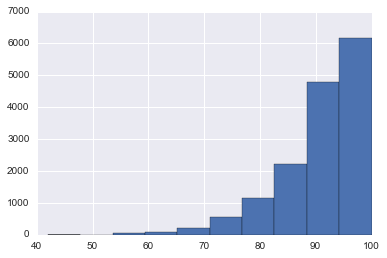

In [58]:
# 8 Create a hist of the scores with 10 bins
inspections.Score.hist(bins=10)

In [54]:
# 9 Can you predict risk category based on the other features in this dataset?
multi_agency = restaurant_scores[restaurant_scores['type'] == 'Multi-agency Investigation']
print "Risk category percentages when the inspection has Multi-agency Investigation: "
print multi_agency.groupby('risk_category').risk_category.count()/multi_agency.risk_category.count()
print "Risk category percentages of the whole dataset:"
restaurant_scores.groupby('risk_category').risk_category.count()/restaurant_scores.risk_category.count()

print "\n\n Multi-agency investigation inspections seems to result in higher risk infractions. It is expected since we can assume this \n kind of investigation only happens in severe cases."

Risk category percentages when the inspection has Multi-agency Investigation: 
Series([], Name: risk_category, dtype: float64)
Risk category percentages of the whole dataset:


 Multi-agency investigation inspections seems to result in higher risk infractions. It is expected since we can assume this 
 kind of investigation only happens in severe cases.


In [15]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [16]:
############################
### A Little More Morbid ###
############################

In [17]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head(5)

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [18]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)

In [55]:
# 2. Show the count of missing values in each column
killings.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [20]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna('Unknown', inplace=True)

In [21]:
# 4. How many killings were there so far in 2015?
len(killings[killings.year==2015])

467

In [22]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').age.count()

gender
Female     22
Male      445
Name: age, dtype: int64

In [23]:
# 6. How many killings were of unarmed people?
len(killings[killings.armed == 'No'])

102

In [24]:
# 7. What percentage of all killings were unarmed?
len(killings[killings.armed == 'No'])*100/len(killings)

21

In [25]:
# 8. What are the 5 states with the most killings?
killings.groupby('state').state.count().sort_values(ascending= False).head()

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [26]:
# 9. Show a value counts of deaths for each race
killings.groupby('race').race.count()

race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: race, dtype: int64

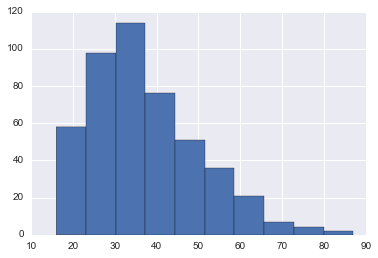

In [59]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

In [28]:
# 11. Show 6 histograms of ages by race
killings.groupby('race').age.hist()

race
Asian/Pacific Islander    Axes(0.125,0.1;0.62x0.8)
Black                     Axes(0.125,0.1;0.62x0.8)
Hispanic/Latino           Axes(0.125,0.1;0.62x0.8)
Native American           Axes(0.125,0.1;0.62x0.8)
Unknown                   Axes(0.125,0.1;0.62x0.8)
White                     Axes(0.125,0.1;0.62x0.8)
Name: age, dtype: object

In [29]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

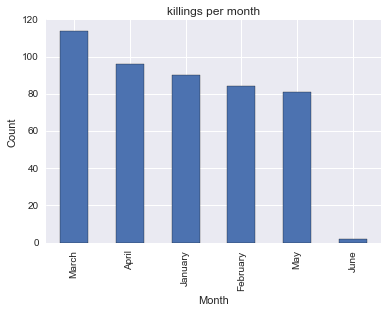

In [60]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar', title='killings per month')
plt.xlabel('Month')
plt.ylabel('Count')

In [31]:
###################
### Less Morbid ###
###################

In [32]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [33]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [34]:
# 2. Show the cout of missing values in each column
majors.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [35]:
# 3. What are the top 10 highest paying majors?
majors.sort_values(by='Median', ascending=False).Major.head(10)

59                                 PETROLEUM ENGINEERING
154    PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...
57             NAVAL ARCHITECTURE AND MARINE ENGINEERING
55                             METALLURGICAL ENGINEERING
58                                   NUCLEAR ENGINEERING
56                        MINING AND MINERAL ENGINEERING
97                      MATHEMATICS AND COMPUTER SCIENCE
48                                ELECTRICAL ENGINEERING
45                                  CHEMICAL ENGINEERING
51                GEOLOGICAL AND GEOPHYSICAL ENGINEERING
Name: Major, dtype: object

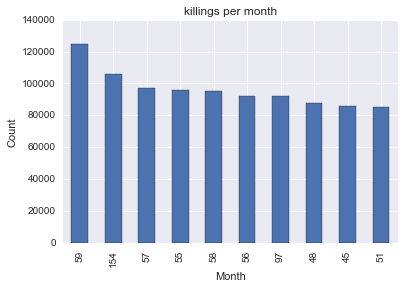

In [61]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.sort_values(by='Median', ascending=False).Median.head(10).plot(kind='bar', title='killings per month')
plt.xlabel('Month')
plt.ylabel('Count')

In [37]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [38]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().sort_values(ascending = False).head()

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

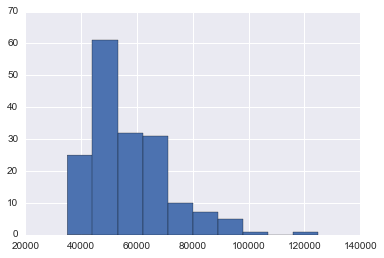

In [62]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000072479CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000076394588>]], dtype=object)

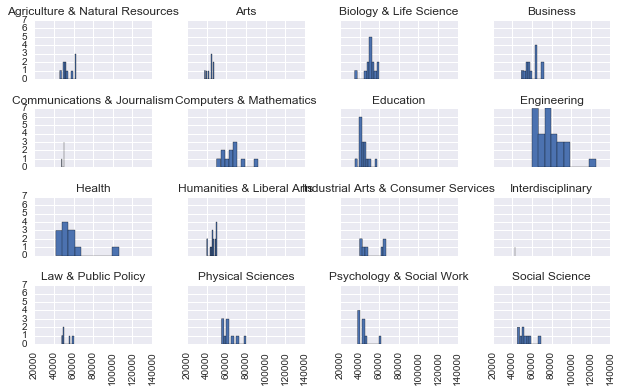

In [94]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.Median.hist(by=majors.Major_category, sharex=True, sharey=True,figsize = (10,6))

#for group in majors.groupby('Major_category'):
#    group.Median.hist()

In [41]:
# 9. What are the top 10 most UNemployed majors?
majors.sort_values(by = 'Unemployment_rate',ascending = False).Major.head(10)

146                     MISCELLANEOUS FINE ARTS
116                         CLINICAL PSYCHOLOGY
93                        MILITARY TECHNOLOGIES
27                    SCHOOL STUDENT COUNSELING
77                              LIBRARY SCIENCE
141                  VISUAL AND PERFORMING ARTS
19     COMPUTER PROGRAMMING AND DATA PROCESSING
119                           SOCIAL PSYCHOLOGY
104                  ASTRONOMY AND ASTROPHYSICS
11                                 ARCHITECTURE
Name: Major, dtype: object

In [42]:
# What are the unemployment rates?
majors.sort_values(by = 'Unemployment_rate',ascending = False).Unemployment_rate.head(10)

146    0.156147
116    0.102712
93     0.101796
27     0.101746
77     0.094843
141    0.094658
19     0.090264
119    0.087336
104    0.086022
11     0.085991
Name: Unemployment_rate, dtype: float64

In [43]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployment_rate.mean().sort_values(ascending = False).head(10)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [44]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.Employed/(majors.Total)
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [45]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
